In [17]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.figure_factory as ff


# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,PowerTransformer
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score,GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC,SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,recall_score

import optuna
import pycaret

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option("max_columns",100)
pd.set_option("max_rows",900)
pd.set_option("max_colwidth",200)

In [18]:
dataset_test = pd.read_csv("test.csv")
dataset_train = pd.read_csv("train.csv")

In [19]:
dataset_test.drop(columns="id",inplace=True)

In [20]:
dataset_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [21]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [22]:
dataset_train.duplicated().sum()

0

In [23]:
dataset_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [24]:
dataset_train.skew()

battery_power    0.031898
blue             0.020016
clock_speed      0.178084
dual_sim        -0.038035
fc               1.019811
four_g          -0.086144
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

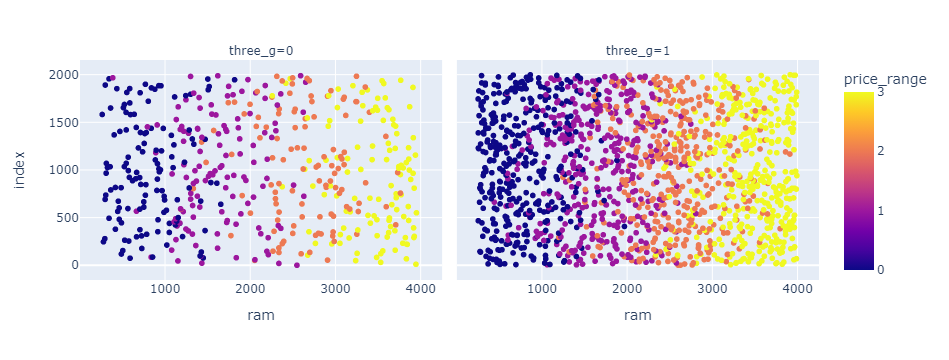

In [25]:
px.scatter(dataset_train,x="ram",color="price_range",facet_col="three_g")

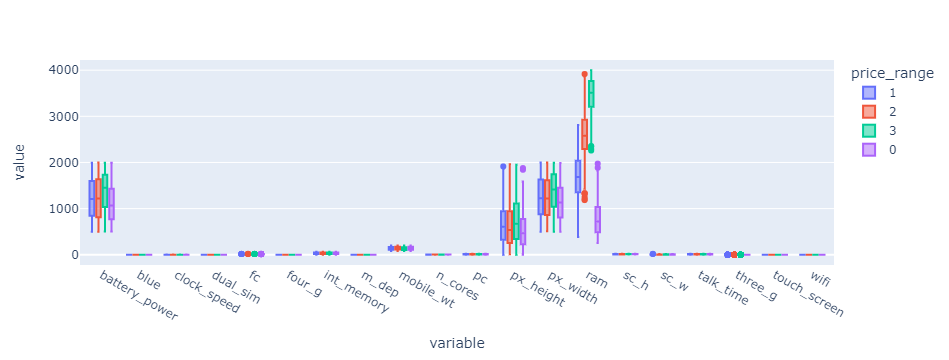

In [26]:
px.box(dataset_train,color="price_range")

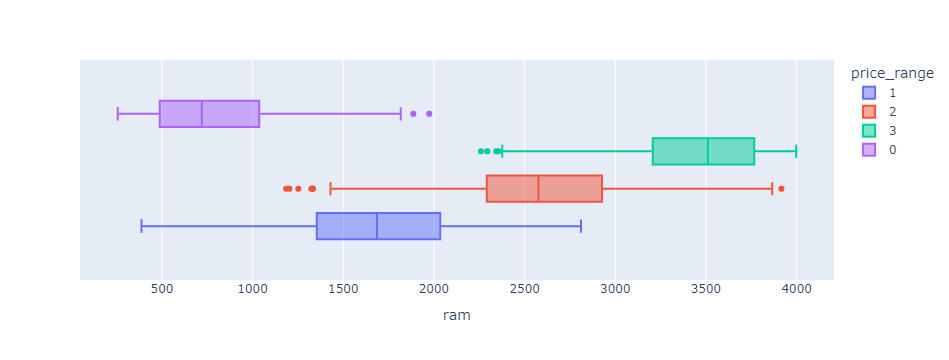

In [27]:
px.box(dataset_train,x ="ram" ,color="price_range")

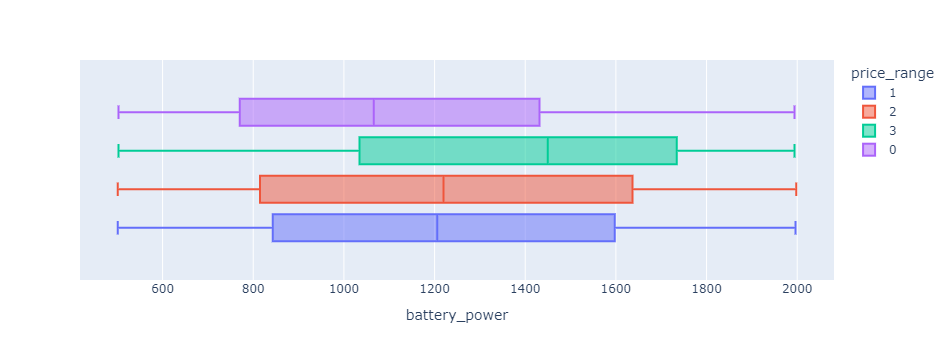

In [28]:
px.box(dataset_train,x ="battery_power" ,color="price_range")

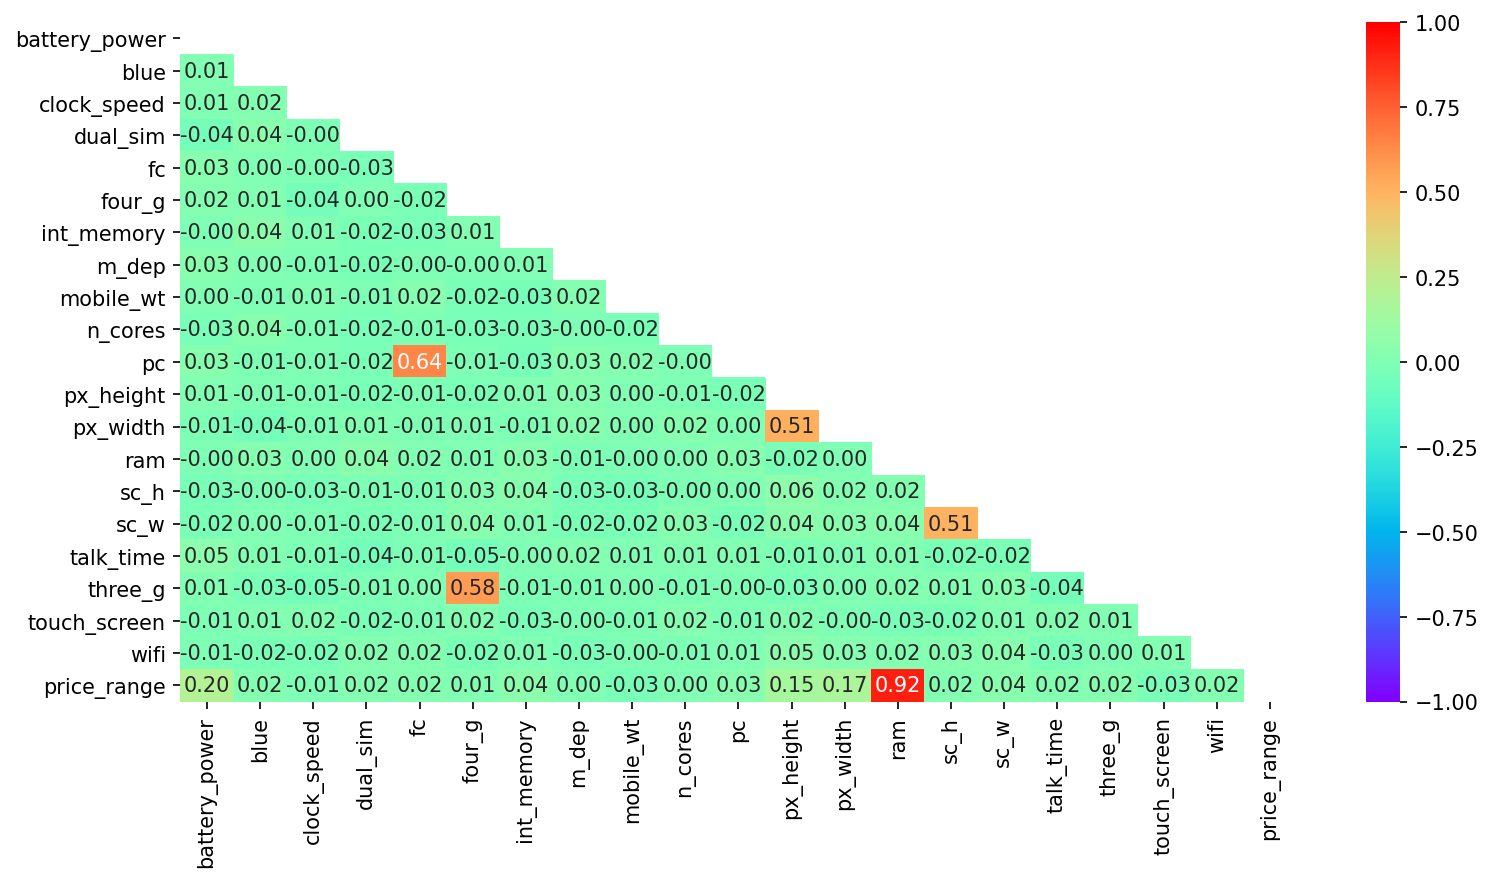

In [29]:
matrix =np.triu(dataset_train.corr())
fig,ax =plt.subplots(figsize=(12,6),dpi=150)
sns.heatmap(dataset_train.corr(),vmax=1,vmin=-1,center=0,annot=True,fmt=".2f",mask=matrix,ax=ax,cmap="rainbow");

In [30]:
dataset_train.price_range.value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [31]:
X = dataset_train.drop("price_range",axis=1)
y = dataset_train.price_range

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
cat_model =CatBoostClassifier(random_state=42,verbose=False).fit(X_train,y_train)
y_pred = cat_model.predict(X_test)

In [35]:
print("-------Test Scores-------")
print()
y_pred = cat_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test,y_pred))

print("-------Train Scores-------")
print()
y_pred_train = cat_model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

-------Test Scores-------

[[125   7   0   0]
 [  6 112   0   0]
 [  0  10 101   9]
 [  0   0   6 124]]

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       132
           1       0.87      0.95      0.91       118
           2       0.94      0.84      0.89       120
           3       0.93      0.95      0.94       130

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.93      0.92      0.92       500

-------Train Scores-------

[[368   0   0   0]
 [  0 382   0   0]
 [  0   0 380   0]
 [  0   0   0 370]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       382
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       370

    accuracy                           1.00      1500
   macro avg       1.00     

# GridsearchCV

In [36]:
params = {"iterations":[100,300],
        "max_depth":[6,8,10],
        "learning_rate":[0.15,0.3,0.5],
        "colsample_bylevel":[0.5,0.8,1]}

cat_model_grid = GridSearchCV(cat_model,param_grid=params,scoring="accuracy",cv=10,verbose=False,n_jobs=-1)

In [37]:
cat_model_grid.fit(X_train,y_train)
y_pred =cat_model_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[125   7   0   0]
 [  5 112   1   0]
 [  0  10 101   9]
 [  0   0  10 120]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       132
           1       0.87      0.95      0.91       118
           2       0.90      0.84      0.87       120
           3       0.93      0.92      0.93       130

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.91       500
weighted avg       0.92      0.92      0.92       500



In [23]:
cat_model_grid = CatBoostClassifier(random_state=42,colsample_bylevel= 1,iterations = 300,
                                    learning_rate= 0.15, max_depth = 6,verbose=False).fit(X_train,y_train)

In [24]:
print("-------Test Scores-------")
y_pred = cat_model_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("-------Train Scores-------")
y_pred_train = cat_model_grid.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

-------Test Scores-------
[[128   4   0   0]
 [  7 109   2   0]
 [  0  12  99   9]
 [  0   0   7 123]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       132
           1       0.87      0.92      0.90       118
           2       0.92      0.82      0.87       120
           3       0.93      0.95      0.94       130

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500

-------Train Scores-------
[[368   0   0   0]
 [  0 382   0   0]
 [  0   0 380   0]
 [  0   0   0 370]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       382
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       370

    accuracy                           1.00      1500
   macro avg       1.00      1.0

In [1]:
feats = pd.DataFrame(index=X.columns,data=cat_model_grid.feature_importances_,columns=['Importance'])
imp_feats = feats.sort_values("Importance")
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance')

plt.xticks(rotation=90);

<IPython.core.display.Javascript object>

NameError: name 'X' is not defined

# Feature Selection 

In [105]:
df = dataset_train.loc[:,["ram","battery_power","px_height","px_width","price_range"]]
df

,ram,battery_power,px_height,px_width,price_range
0,2549,842,20,756,1
1,2631,1021,905,1988,2
2,2603,563,1263,1716,2
3,2769,615,1216,1786,2
4,1411,1821,1208,1212,1
...,...,...,...,...,...
1995,668,794,1222,1890,0
1996,2032,1965,915,1965,2
1997,3057,1911,868,1632,3
1998,869,1512,336,670,0


In [106]:
X = df.drop("price_range",axis=1)
y = df.price_range

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
cat_model_feature = CatBoostClassifier(random_state=42,colsample_bylevel= 1,iterations = 300,
                                    learning_rate= 0.15, max_depth = 6,verbose=False).fit(X_train,y_train)
y_pred = cat_model_feature.predict(X_test)
y_pred_proba = cat_model_feature.predict_proba(X_test)

In [153]:
print("-------Test Scores-------")
y_pred = cat_model_feature.predict(X_test)
print()
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test,y_pred))

print("-------Train Scores-------")
y_pred_train = cat_model_feature.predict(X_train)
print()
print(confusion_matrix(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

print(f'Roc Auc Score:{roc_auc_score(y_test,y_pred_proba,multi_class="ovr",average="macro")}')

-------Test Scores-------

[[126   6   0   0]
 [  2 115   1   0]
 [  0   7 108   5]
 [  0   0   7 123]]

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       132
           1       0.90      0.97      0.93       118
           2       0.93      0.90      0.92       120
           3       0.96      0.95      0.95       130

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.95      0.94      0.94       500

-------Train Scores-------

[[368   0   0   0]
 [  0 382   0   0]
 [  0   0 380   0]
 [  0   0   1 369]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       382
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       370

    accuracy                           1.00      1500
   macro avg       1.00     